In [1]:
from base_layer_utils import BaseLayerResultsRepo

/home/kai/anaconda3/envs/tf_gpu/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from toxic_utils import scatter_per_label
%matplotlib inline

In [3]:
base_layer_results_repo = BaseLayerResultsRepo()

scores = base_layer_results_repo.show_scores()

load from file
0.9827	ModelName.NBLSVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real
0.9825	ModelName.RNN_rnn_data_001
0.9818	ModelName.ONELOGREG_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real
0.9815	ModelName.NBLSVC_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9803	ModelName.NBSVM_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9794	ModelName.LGB_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9793	ModelName.LOGREG_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9786	ModelName.ONESVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w
0.9774	ModelName.NBLSVC_tfidf_word_df2_ng(1, 1)_wmf200000
0.9768	ModelName.NBSVM_tfidf_word_df2_ng(1, 1)_wmf200000
0.9765	ModelName.NBLSVC_tfidf_word_df2_ng(1, 2)_wmf200000
0.9761	ModelName.NBSVM_tfidf_word_df2_ng(1, 2)_wmf200000
0.976	ModelName.LOGREG_tfidf_word_df2_ng(1, 1)_wmf200000
0.9752	ModelName.LOGREG_tfidf_word_df2_ng(1, 2)_wmf200000
0.9726	ModelName.LGB_tfidf_word_df2_ng(1, 2)_wmf200000


In [11]:
selected_top_n = []
for item in scores[:2]: # select top n. OR you can manually select from the score list above
    selected_top_n.append(item[0])

In [5]:
selected_top_n = ['ModelName.RNN_rnn_data_001',
                  'ModelName.NBLSVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real',
                 'ModelName.ONELOGREG_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real',
                 'ModelName.NBLSVC_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000']

In [29]:
selected_top_n = ['ModelName.NBLSVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real',
                 'ModelName.NBSVM_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real']

In [50]:
selected_top_n = ['ModelName.NBLSVC_tfidf_word_df2_ng(1, 1)_wmf200000',
                 'ModelName.NBSVM_tfidf_word_df2_ng(1, 1)_wmf200000']

In [6]:
selected_top_n

['ModelName.RNN_rnn_data_001',
 'ModelName.NBLSVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real',
 'ModelName.ONELOGREG_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real',
 'ModelName.NBLSVC_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000']

In [7]:
path = '/home/kai/data/kaggle/toxic/sc/stacking/BaseEstPreds/'

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

base_est_result_repo = {}

label_cols = []
for filename in os.listdir(path):
    for selected in selected_top_n:
        if selected in filename:
            print(filename)
            tmp = pd.read_csv(path+filename)
            filename = filename[10:19] + '...' + filename[-9:-4]
            base_est_result_repo[filename] = tmp
            label_cols = list(tmp.columns)
            label_cols.pop(0) # remove 'id'

ModelName.NBLSVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real_1519952490.csv
ModelName.RNN_rnn_data_001_1519810384.csv
ModelName.NBLSVC_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000_1519815498.csv
ModelName.ONELOGREG_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real_1519871931.csv


toxic
severe_toxic
obscene
threat
insult
identity_hate
['NBLSVC_wo...52490', 'NBLSVC_tf...15498', 'RNN_rnn_d...10384', 'ONELOGREG...71931']


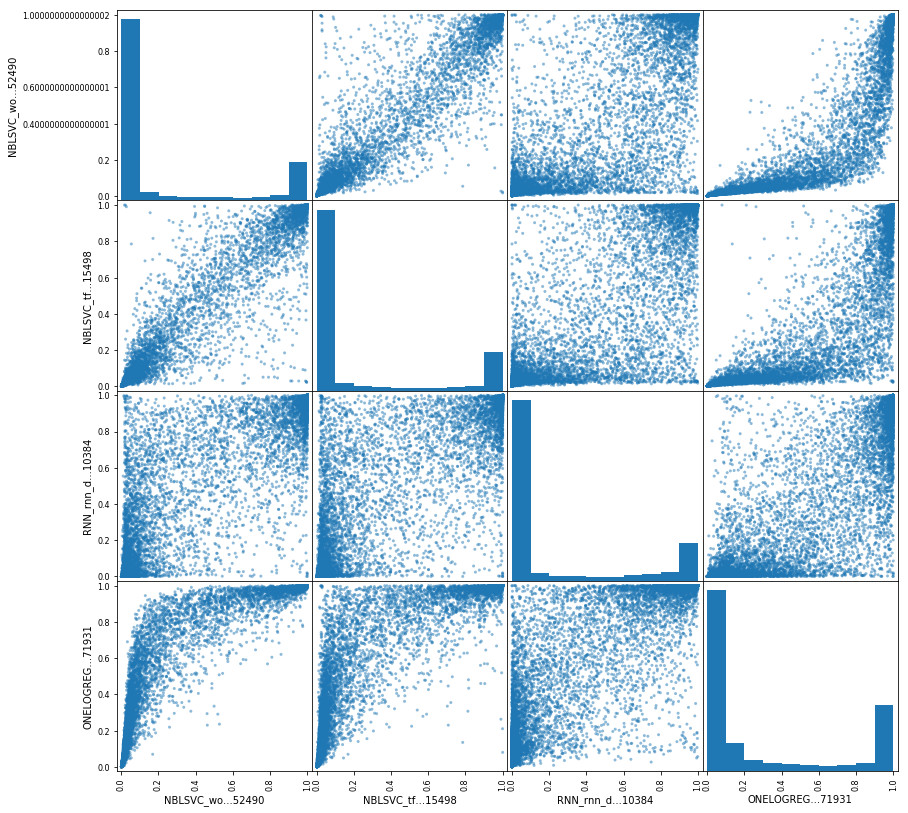

In [8]:
scatter_per_label(base_est_result_repo, 'toxic', 20000)

toxic
severe_toxic
obscene
threat
insult
identity_hate
['LGB_tfidf...15487', 'ONELOGREG...71931', 'NBSVM_wor...52492', 'NBLSVC_tf...15489', 'LOGREG_tf...15504', 'NBSVM_tfi...15490', 'NBLSVC_tf...15496']


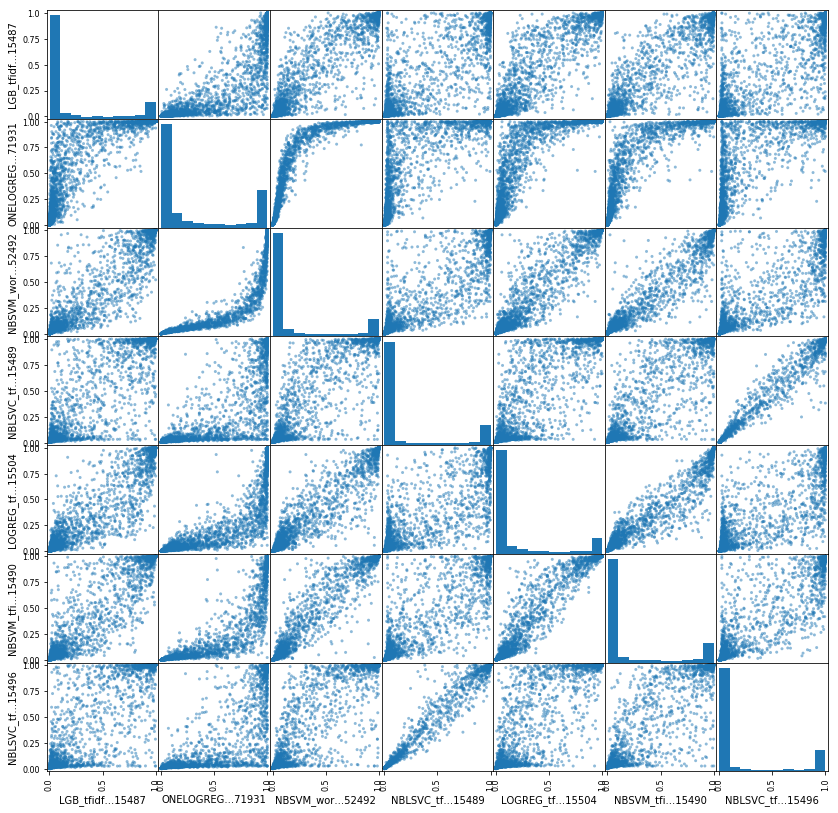

In [28]:
scatter_per_label(base_est_result_repo, 'toxic', 5000)

In [12]:
import pandas as pd
# import sys
from scipy.stats import ks_2samp

# first_file = sys.argv[1]
# second_file = sys.argv[2]

def corr(first_df, second_df):#first_file, second_file):
    # assuming first column is `class_name_id`
#     first_df = pd.read_csv(first_file, index_col=0)
#     second_df = pd.read_csv(second_file, index_col=0)
    class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

    for class_name in class_names:
        # all correlations
        print('\n Class: %s' % class_name)
        print(' Pearson\'s correlation score: %0.6f\
              ' %first_df[class_name].corr(
                  second_df[class_name], method='pearson'))
        print(' Kendall\'s correlation score: %0.6f\
              ' %first_df[class_name].corr(
                  second_df[class_name], method='kendall'))
        print(' Spearman\'s correlation score: %0.6f\
              ' %first_df[class_name].corr(
                  second_df[class_name], method='spearman'))
        ks_stat, p_value = ks_2samp(first_df[class_name].values,
                                    second_df[class_name].values)
        print(' Kolmogorov-Smirnov test:    KS-stat = %0.6f    p-value = %0.3e\n'% (ks_stat, p_value))

corr(first_file, second_file)


 Class: toxic


TypeError: string indices must be integers

toxic
severe_toxic
obscene
threat
insult
identity_hate
['LOGREG_tf...15504', 'LGB_tfidf...15487', 'NBSVM_tfi...15490', 'RNN_rnn_d...10384', 'NBLSVC_tf...15498', 'ONESVC_wo...71930', 'ONELOGREG...71931']


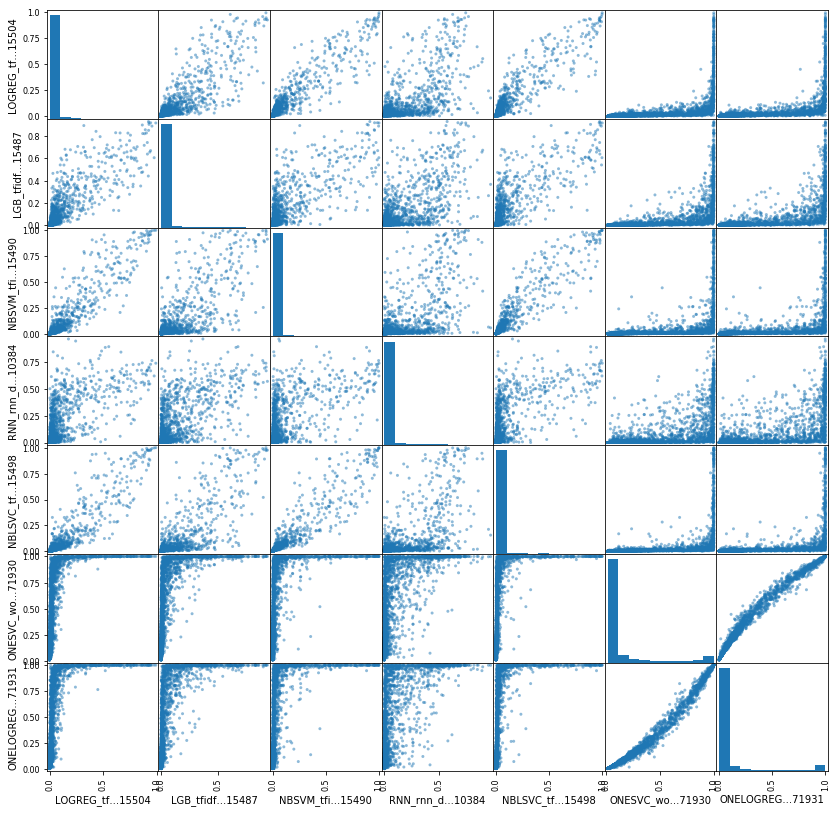

In [8]:
scatter_per_label(base_est_result_repo, 'severe_toxic', 10000)

toxic
severe_toxic
obscene
threat
insult
identity_hate
['LOGREG_tf...15504', 'LGB_tfidf...15487', 'NBSVM_tfi...15490', 'RNN_rnn_d...10384', 'NBLSVC_tf...15498', 'ONESVC_wo...71930', 'ONELOGREG...71931']


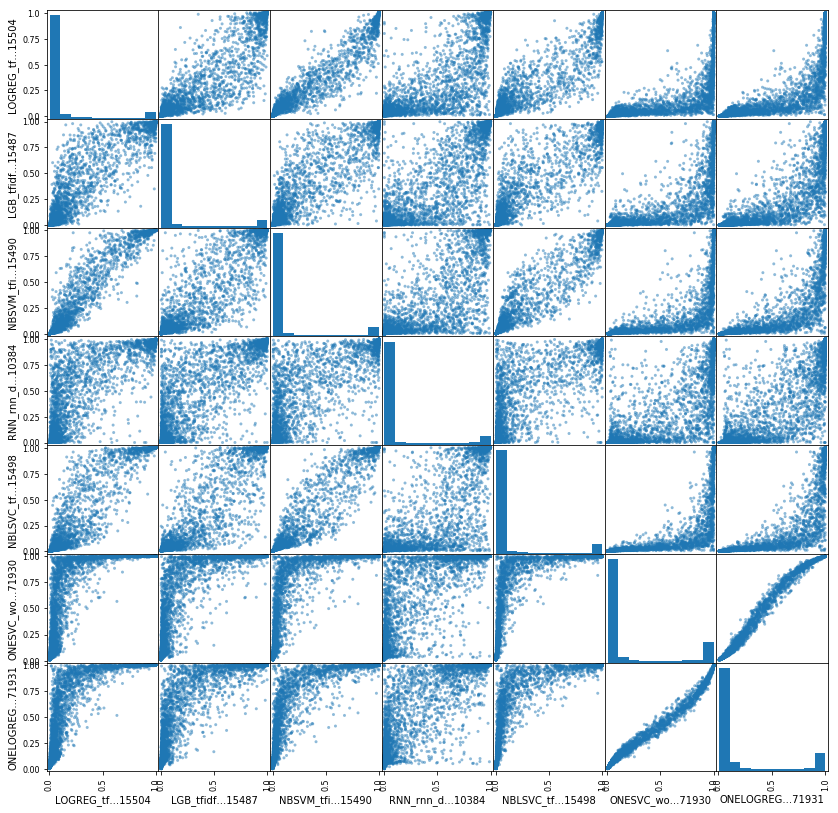

In [10]:
scatter_per_label(base_est_result_repo, 'obscene', 10000)

In [9]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']